In [2]:
import os
from google.cloud import storage
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import csv
import pywt
import time
from numpy import square, sum, log2

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/serene-snowfall-414405-5220794367c6.json'
header =["distance_node_4","distance_node_7","Time_4_1","Time_4_2","Time_4_3","Time_7_1","Time_7_2","Time_7_3"]
index = 0
wee_header = ['distance_4','distance_7',

          '4WEE(cd1(E1))', '4WEE(cd2(E1))', '4WEE(ca2(E1))', '4Max(cd1(E1))', '4Max(cd2(E1))', '4Max(ca2(E1))', '4Min(cd1(E1))', '4Min(cd2(E1))', '4Min(ca2(E1))', '4Avg(cd1(E1))', '4Avg(cd2(E1))', '4Avg(ca2(E1))',
          '4WEE(cd1(E2))', '4WEE(cd2(E2))', '4WEE(ca2(E2))', '4Max(cd1(E2))', '4Max(cd2(E2))', '4Max(ca2(E2))', '4Min(cd1(E2))', '4Min(cd2(E2))', '4Min(ca2(E2))', '4Avg(cd1(E2))', '4Avg(cd2(E2))', '4Avg(ca2(E2))',
          '4WEE(cd1(E3))', '4WEE(cd2(E3))', '4WEE(ca2(E3))', '4Max(cd1(E3))', '4Max(cd2(E3))', '4Max(ca2(E3))', '4Min(cd1(E3))', '4Min(cd2(E3))', '4Min(ca2(E3))', '4Avg(cd1(E3))', '4Avg(cd2(E3))', '4Avg(ca2(E3))',
          '7WEE(cd1(E1))', '7WEE(cd2(E1))', '7WEE(ca2(E1))', '7Max(cd1(E1))', '7Max(cd2(E1))', '7Max(ca2(E1))', '7Min(cd1(E1))', '7Min(cd2(E1))', '7Min(ca2(E1))', '7Avg(cd1(E1))', '7Avg(cd2(E1))', '7Avg(ca2(E1))',
          '7WEE(cd1(E2))', '7WEE(cd2(E2))', '7WEE(ca2(E2))', '7Max(cd1(E2))', '7Max(cd2(E2))', '7Max(ca2(E2))', '7Min(cd1(E2))', '7Min(cd2(E2))', '7Min(ca2(E2))', '7Avg(cd1(E2))', '7Avg(cd2(E2))', '7Avg(ca2(E2))',
          '7WEE(cd1(E3))', '7WEE(cd2(E3))', '7WEE(ca2(E3))', '7Max(cd1(E3))', '7Max(cd2(E3))', '7Max(ca2(E3))', '7Min(cd1(E3))', '7Min(cd2(E3))', '7Min(ca2(E3))', '7Avg(cd1(E3))', '7Avg(cd2(E3))', '7Avg(ca2(E3))',
          'type','phase']

header =["distance_node_4","distance_node_7","Time_4_1","Time_4_2","Time_4_3","Time_7_1","Time_7_2","Time_7_3"]

storage_client = storage.Client()

# Specify your bucket name
bucket_name = 'ieee9bus'

# List objects in the bucket

In [3]:
def calculate_wee_for_coefficients(signal):

    # Perform 3-level discrete wavelet transform
    coeffs = pywt.wavedec(signal, 'db1', level=2)

    # Find maximum values of detail & approximation coefficients
    max_cd1 = np.max(coeffs[2]) if isinstance(coeffs[2], np.ndarray) else np.nan
    max_cd2 = np.max(coeffs[1]) if isinstance(coeffs[1], np.ndarray) else np.nan
    max_ca2 = np.max(coeffs[0]) if isinstance(coeffs[0], np.ndarray) else np.nan

    # Find minimum values of detail & approximation coefficients
    min_cd1 = np.min(coeffs[2]) if isinstance(coeffs[2], np.ndarray) else np.nan
    min_cd2 = np.min(coeffs[1]) if isinstance(coeffs[1], np.ndarray) else np.nan
    min_ca2 = np.min(coeffs[0]) if isinstance(coeffs[0], np.ndarray) else np.nan

    # Find minimum values of detail & approximation coefficients
    avg_cd1 = np.average(coeffs[2]) if isinstance(coeffs[2], np.ndarray) else np.nan
    avg_cd2 = np.average(coeffs[1]) if isinstance(coeffs[1], np.ndarray) else np.nan
    avg_ca2 = np.average(coeffs[0]) if isinstance(coeffs[0], np.ndarray) else np.nan

    # Calculate energy for ca2, cd2, cd1
    energy_ca2 = sum(square(coeffs[0])) if isinstance(coeffs[0], np.ndarray) else 0
    energy_cd2 = sum(square(coeffs[1])) if isinstance(coeffs[1], np.ndarray) else 0
    energy_cd1 = sum(square(coeffs[2])) if isinstance(coeffs[2], np.ndarray) else 0

    # Calculate normalized energy and entropy for ca2, cd2, cd1
    total_energy = energy_ca2 + energy_cd2 + energy_cd1
    if total_energy > 0:
        wee_ca2 = energy_ca2 / total_energy
        wee_cd2 = energy_cd2 / total_energy
        wee_cd1 = energy_cd1 / total_energy
    else:
        wee_ca2 = 0
        wee_cd2 = 0
        wee_cd1 = 0

    row.append(wee_cd1)
    row.append(wee_cd2)
    row.append(wee_ca2)
    row.append(max_cd1)
    row.append(max_cd2)
    row.append(max_ca2)
    row.append(min_cd1)
    row.append(min_cd2)
    row.append(min_ca2)
    row.append(avg_cd1)
    row.append(avg_cd2)
    row.append(avg_ca2)




In [4]:
def cal_distance(file):

  csv_file_list = file.split('_')
  if csv_file_list[1] == '4':
      if csv_file_list[2] == '5':
          dis_4 = float(csv_file_list[3])
          dis_7 = 20000 - float(csv_file_list[3])

      elif csv_file_list[2] == '6':
          dis_4 = float(csv_file_list[3])
          dis_7 = 20000 + float(csv_file_list[3])

  elif csv_file_list[1] == '5':
      dis_4 = 10000 + float(csv_file_list[3])
      dis_7 = 10000 - float(csv_file_list[3])
  elif csv_file_list[1] == '6':
      dis_4 = 10000 + float(csv_file_list[3])
      dis_7 = 30000 - float(csv_file_list[3])
  elif csv_file_list[1] == '7':
      dis_4 = 20000 + float(csv_file_list[3])
      dis_7 = float(csv_file_list[3])
  elif csv_file_list[1] == '8':
      dis_4 = 30000 - float(csv_file_list[3])
      dis_7 = 10000 + float(csv_file_list[3])
  row.append(dis_4)
  row.append(dis_7)
  row_2.append(dis_4)
  row_2.append(dis_7)

In [5]:
def get_time(dataset):
    for j in [4,10]:
        max_value_index = dataset.iloc[:, j].idxmax()
        time_taken = float(dataset.iloc[max_value_index, 0])
        row.append(time_taken)

In [6]:
def type_phase(file):
  csv_file_list = file.split('_')
  if csv_file_list[0] == 'L':
    row.append('L')

    if csv_file_list[4][0] == '1':
      row.append('1')
    elif csv_file_list[4][0]  == '2':
      row.append('2')
    elif csv_file_list[4][0]  == '3':
      row.append('3')
  elif csv_file_list[0] == 'N':
    row.append('N')
    row.append('0')
  else:
    row.append('O')
    row.append('0')



In [12]:
bucket = storage_client.bucket(bucket_name)
blobs = bucket.list_blobs()

#folder_path = 'no faults/'

#folder_path = 'phase 3/'
folder_path = 'phase 1/phase 1 50/'
#folder_path = 'Other faults/type 100/'
# Create a storage client and get the bucket
client = storage.Client()
bucket = client.get_bucket(bucket_name)

# List all files in the specified folder
blobs = bucket.list_blobs(prefix=folder_path)

# Display the list of files
file_list = [blob.name.split('/')[2] for blob in blobs]
print("Files in the specified folder:")
print(len(file_list))
# Download the file
count = 0
with open('phase_1_wee.csv', 'w', newline='') as WEE_value_set, \
     open('arrival_phase_1.csv', 'w', newline='') as arrival_file:
  csv_writer = csv.writer(WEE_value_set)
  arrival_csv_writer = csv.writer(arrival_file)
  csv_writer.writerow(wee_header)
  arrival_csv_writer.writerow(header)

  while count < len(file_list):
    row = []
    row_2 = []
    file_name = folder_path+file_list[count]
    blob = bucket.blob(file_name)
    blob.download_to_filename(file_list[count])


    cal_distance(file_list[count])
    print(os.path.getsize(file_list[count])/1024/1024)
    if os.path.getsize(file_list[count])/1024/1024 > 300:
      df = pd.read_csv(file_list[count])
      for j in [4,5,6,10,11,12]:
          abs_diff = df.iloc[:, j].diff().abs()
          sudden_rise_idx = (abs_diff > 10).idxmax()

          rise_time = df.iloc[sudden_rise_idx,0]

          row_2.append(rise_time)
          column = df.iloc[:, j].values
          calculate_wee_for_coefficients(column)


      #get_time(df)
      type_phase(file_list[count])
      row.append(file_list[count])
      csv_writer.writerow(row)
      row.clear()
      row_2.append(file_list[count])
      arrival_csv_writer.writerow(row_2)
      row_2.clear()
      !rm {file_list[count]}
      print(f'{file_list[count]} is completed')
    else:
      print(f"The file {file_list[count]} is empty.")
    count +=1
files.download('phase_1_wee.csv')
files.download('arrival_phase_1.csv')

Files in the specified folder:
1194
L_4_5_1000_1.csv is completed
L_4_5_100_1.csv is completed
L_4_5_1050_1.csv is completed
L_4_5_1100_1.csv is completed
L_4_5_1150_1.csv is completed
L_4_5_1200_1.csv is completed
L_4_5_1250_1.csv is completed
L_4_5_1300_1.csv is completed
L_4_5_1350_1.csv is completed
L_4_5_1400_1.csv is completed
L_4_5_1450_1.csv is completed
L_4_5_1500_1.csv is completed
L_4_5_150_1.csv is completed
L_4_5_1550_1.csv is completed
L_4_5_1600_1.csv is completed
L_4_5_1650_1.csv is completed
L_4_5_1700_1.csv is completed
L_4_5_1750_1.csv is completed
L_4_5_1800_1.csv is completed
L_4_5_1850_1.csv is completed
L_4_5_1900_1.csv is completed
L_4_5_1950_1.csv is completed
L_4_5_2000_1.csv is completed
L_4_5_200_1.csv is completed
L_4_5_2050_1.csv is completed
L_4_5_2100_1.csv is completed
L_4_5_2150_1.csv is completed
L_4_5_2200_1.csv is completed
L_4_5_2250_1.csv is completed
L_4_5_2300_1.csv is completed
L_4_5_2350_1.csv is completed
L_4_5_2400_1.csv is completed
L_4_5_2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-14-ef19ae27f776>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('arrival_phase_1.csv', index_col=False)


0       0.010003
1       0.010000
2       0.010003
3       0.010003
4       0.010004
          ...   
1189    0.010061
1190    0.010061
1191    0.010061
1192    0.010061
1193    0.010061
Name: Time_4_1, Length: 1194, dtype: float64


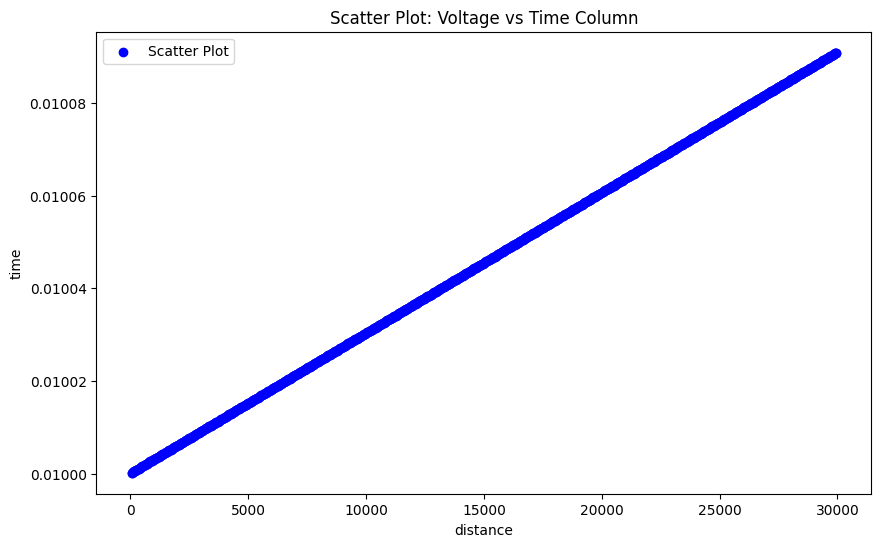

0       0.010058
1       0.010060
2       0.010058
3       0.010057
4       0.010057
          ...   
1189    0.010060
1190    0.010060
1191    0.010060
1192    0.010060
1193    0.010061
Name: Time_7_1, Length: 1194, dtype: float64


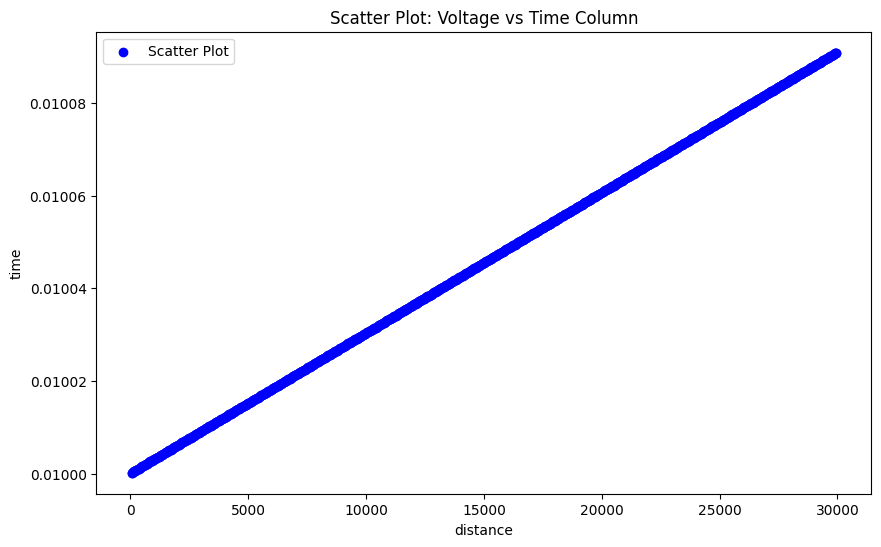

In [14]:
df = pd.read_csv('arrival_phase_1.csv', index_col=False)
distance = df.iloc[:,0]
time = df.iloc[:, 2]
print(time)
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(distance, time, label='Scatter Plot', marker='o', color='blue')

# Label for the x-axis and y-axis
plt.xlabel('distance')
plt.ylabel('time')

# Title of the plot
plt.title('Scatter Plot: Voltage vs Time Column')

# Show legend
plt.legend()

# Show the plot
plt.show()
distance = df.iloc[:,1]
time = df.iloc[:, 5]
print(time)
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(distance, time, label='Scatter Plot', marker='o', color='blue')

# Label for the x-axis and y-axis
plt.xlabel('distance')
plt.ylabel('time')

# Title of the plot
plt.title('Scatter Plot: Voltage vs Time Column')

# Show legend
plt.legend()

# Show the plot
plt.show()